
#Theoretical Questions





###**1. Can we use Bagging for regression problems?**Yes, we absolutely can. The method is called **Bagging Regressor**.

* Instead of training base classifiers (like Decision Tree Classifiers) to predict a class, it trains **base regressors** (like Decision Tree Regressors) to predict a continuous value.
* The final prediction is typically the **average** of the predictions made by all the individual regressors in the ensemble.

###**2. What is the difference between multiple model training and single model training?**| Feature | Single Model Training | Multiple Model Training (Ensemble) |
| --- | --- | --- |
| **Goal** | Optimize a single model's performance. | Combine predictions from several base models to improve overall performance and robustness. |
| **Bias/Variance** | Can suffer from high bias (underfitting) or high variance (overfitting). | Aims to reduce variance (Bagging) or bias (Boosting) by combining models. |
| **Complexity** | Generally simpler, faster to train and interpret. | More complex, slower to train (multiple models) and harder to interpret. |
| **Prediction** | Single prediction from one model. | Combined prediction (e.g., average, majority vote) from multiple models. |
| **Robustness** | Less robust to noise and fluctuations in the training data. | More robust and stable due to the aggregation of diverse models. |

###**3. Explain the concept of feature randomness in Random Forest.**Feature randomness, also known as **random subspace method** or **feature bagging**, is a key distinguishing factor of Random Forest from standard Bagging.

* **Process:** When building *each* individual decision tree in the forest, instead of searching across *all* features to find the best split at each node, the algorithm only considers a random subset of the features.
* **Hyperparameter:** The size of this random subset is controlled by a hyperparameter, often denoted as m or `max_features` (e.g., typically \sqrt{p} for classification and p/3 for regression, where p is the total number of features).
* **Effect:** This step further **decorrelates** the individual trees. If there is one very strong predictor feature, standard Bagging trees would all pick it early on, making them highly similar. By only allowing a random subset of features, we force the trees to be more diverse, which is crucial for reducing the final ensemble's variance.

###**4. What is OOB (Out-of-Bag) Score?**The Out-of-Bag (OOB) score is a way to estimate the performance of a Bagging-based ensemble model (like Random Forest) **without the need for a separate validation set**.

* **Out-of-Bag Samples:** Due to bootstrap sampling, each base model (tree) in the ensemble is trained on a unique subset of the training data. The data points that **were not included** in the bootstrap sample for a specific tree are called the **Out-of-Bag (OOB) samples** for that tree. Typically, about **37%** of the original training data are OOB for any given tree.
* **OOB Score Calculation:**
1. For each training data point, identify the subset of trees for which this data point was an OOB sample.
2. The final OOB prediction for that data point is the average (regression) or majority vote (classification) of only those trees.
3. The OOB Score is the overall accuracy (classification) or R^2/MSE (regression) of these OOB predictions on the training set.



This score provides an internal, unbiased estimate of the model's generalization performance.

###**5. How can you measure the importance of features in a Random Forest model?**Random Forest inherently provides a robust way to estimate feature importance, most commonly measured using **Mean Decrease in Impurity (MDI)** or **Gini Importance**.

* **Principle:** When a node in a decision tree is split using a particular feature, the impurity (e.g., Gini impurity or entropy for classification, or variance for regression) of the resulting child nodes is generally less than the parent node. The **total decrease in impurity** contributed by a feature, averaged across all the trees in the forest, is its importance score.
* **Interpretation:** A higher importance score indicates that the feature was used more frequently and effectively to split the nodes, leading to greater homogeneity in the resulting subsets (i.e., it was a better predictor).

###**6. Explain the working principle of a Bagging Classifier?**The working principle of a Bagging Classifier (Bootstrap Aggregating) is as follows:

1. **Bootstrap Sampling:** The algorithm generates N new training datasets by **sampling with replacement** (bootstrapping) from the original training dataset. Each new dataset is approximately the same size as the original but contains duplicate instances and omits some original instances (OOB samples).
2. **Base Model Training:** A base classifier (e.g., Decision Tree, which is often a **high-variance, low-bias** model) is trained independently on each of the N bootstrap samples.
3. **Aggregation (Voting):** To make a final prediction for a new instance, all N individual classifiers make their own prediction. The final classification is determined by the **majority vote** (or mode) of the predictions from all the base classifiers.

###**7. How do you evaluate a Bagging Classifier’s performance?**A Bagging Classifier's performance is typically evaluated using standard machine learning metrics on a **held-out test set** or via its **OOB Score**.

* **Using a Test Set:**
* **Classification Metrics:** Accuracy, Precision, Recall, F1-Score, AUC-ROC.


* **Using OOB Score (Internal Validation):**
* As described in question 4, the OOB score provides a good estimate of generalization without partitioning the training data.



###**8. How does a Bagging Regressor work?**The working of a Bagging Regressor is nearly identical to a Bagging Classifier, with one key difference in the aggregation step:

1. **Bootstrap Sampling:** Same as in classification.
2. **Base Regressor Training:** A base regressor (e.g., Decision Tree Regressor) is trained on each bootstrap sample.
3. **Aggregation (Averaging):** To make a final prediction for a new instance, all individual regressors make a prediction of a continuous value. The final prediction is the **average** (mean) of all the individual predictions.

###**9. What is the main advantage of ensemble techniques?**The main advantage of ensemble techniques is their ability to significantly **improve the stability and accuracy** of a model compared to any single base model, primarily by **reducing variance** (Bagging/Random Forest) or **reducing bias** (Boosting).

###**10. What is the main challenge of ensemble methods?**The main challenge of ensemble methods is **reduced interpretability** and **increased computational cost/time**.

* **Interpretability:** Since the final prediction is the result of many models interacting, it becomes much harder to understand *why* a particular prediction was made (the "black box" problem).
* **Computational Cost:** Training and storing multiple base models (sometimes hundreds or thousands) can be significantly more time-consuming and memory-intensive than training a single model.

###**11. Explain the key idea behind ensemble techniques?**The key idea behind ensemble techniques is that a **collection of weak or mediocre models can collectively form a powerful model** that is more accurate, robust, and stable than any of its individual components.

This improvement relies on the base models making diverse errors. When models are diverse, their errors tend to cancel each other out during aggregation.

###**12. What is a Random Forest Classifier?**A Random Forest Classifier is an ensemble learning method that is a type of **Bagging technique** specifically tailored for decision trees.

* **Components:** It consists of a large number of individual decision trees that operate as an ensemble.
* **Two Randomness Sources (Key Idea):**
1. **Bootstrap Aggregating (Row Sampling):** Each tree is trained on a random sample of the training data (bootstrap sample).
2. **Feature Randomness (Column Sampling):** At each split during the tree-building process, only a random subset of features is considered.


* **Prediction:** The final classification is the **majority vote** of the individual trees.

###**13. What are the main types of ensemble techniques?**The two main types of ensemble techniques are:

1. **Bagging (Bootstrap Aggregating):**
* **Goal:** Primarily to **decrease variance** and reduce overfitting.
* **How:** Trains base models in **parallel** on different bootstrap samples of the data and aggregates their results (e.g., Random Forest, Bagging Classifier/Regressor).


2. **Boosting:**
* **Goal:** Primarily to **decrease bias** and transform weak learners into strong learners.
* **How:** Trains base models **sequentially**, where each new model tries to correct the errors of the previous one (e.g., AdaBoost, Gradient Boosting, XGBoost, LightGBM).



*Other types include **Stacking/Stacked Generalization** which trains a meta-model to combine the predictions of several different base models.*

###**14. What is ensemble learning in machine learning?**Ensemble learning is a general meta-algorithm approach where the goal is to **combine the predictions of multiple base estimators** (e.g., classifiers or regressors) to achieve better predictive performance than could be obtained from any single base estimator.

###**15. When should we avoid using ensemble methods?**While powerful, you might consider avoiding or carefully evaluating ensemble methods when:

* **Interpretability is paramount:** If you need a simple, explainable model (e.g., for regulatory purposes), the "black box" nature of ensembles is a drawback.
* **Computational resources are highly constrained:** Ensembles are generally slower to train and require more memory for storage.
* **The base models are already highly correlated and accurate:** If all your base models are making the same predictions and the same errors, combining them will offer little to no benefit.
* **Simple models are sufficient:** If a simple linear model or a single decision tree already achieves satisfactory performance, using a complex ensemble is an unnecessary overhead.

###**16. How does Bagging help in reducing overfitting?**Bagging helps in reducing overfitting by **decreasing the variance** of the base models.

* A single, complex model like a deep Decision Tree often has **high variance**, meaning it is highly sensitive to the specific training data and overfits to its noise.
* Bagging trains many such models on diverse (bootstrapped) datasets.
* When the final predictions are aggregated (averaged or voted), the variance across all the individual models is significantly reduced. The errors that were due to small fluctuations in the training data tend to **cancel each other out**, leading to a more robust, stable model that generalizes better.

###**17. Why is Random Forest better than a single Decision Tree?**Random Forest is almost always better than a single, unpruned Decision Tree for three main reasons:

1. **Reduced Overfitting (Lower Variance):** A single Decision Tree typically suffers from high variance (overfits the training data). Random Forest, through Bagging, significantly reduces this variance, leading to better generalization on unseen data.
2. **Stability/Robustness:** Random Forest is more stable. Small changes in the training data can drastically alter a single Decision Tree, but they have a minimal effect on the aggregate prediction of the entire forest.
3. **Increased Accuracy:** By combining the predictions of many diverse trees, Random Forest achieves a higher overall accuracy. The two sources of randomness (bootstrap sampling and feature randomness) ensure the trees are diverse and their errors are uncorrelated.

###**18. What is the role of bootstrap sampling in Bagging?**Bootstrap sampling is the fundamental technique that makes Bagging effective. Its primary role is to **create diversity** among the base models.

* **Role:** By randomly sampling the training data with replacement to create many different training subsets, bootstrap sampling ensures that each base model is trained on a slightly different view of the data.
* **Effect:** This small difference in the training data causes the base models to make **uncorrelated errors**. This decorrelation is essential because when the models' predictions are aggregated, their independent errors cancel out, reducing the overall variance of the ensemble model.

###**19. What are some real-world applications of ensemble techniques?**Ensemble techniques are widely used across various domains:

* **Finance:** Credit scoring (predicting loan defaults), algorithmic trading (predicting stock movement).
* **E-commerce:** Recommendation systems (predicting product preferences), fraud detection (identifying suspicious transactions).
* **Healthcare/Bioinformatics:** Predicting disease outcomes, analysis of gene expression data.
* **Image Processing/Computer Vision:** Image segmentation, object detection (e.g., using models like Mask R-CNN, which utilizes ensemble ideas).
* **General Prediction:** Nearly all high-performance predictive modeling competitions (e.g., on Kaggle) are won using sophisticated ensemble methods like XGBoost or stacked models.

###**20. What is the difference between Bagging and Boosting?**| Feature | Bagging (e.g., Random Forest) | Boosting (e.g., AdaBoost, XGBoost) |
The core difference between Bagging and Boosting lies in their approach to training and their primary goal. Bagging (like Random Forest) trains multiple base models (often complex, high-variance Decision Trees) in parallel on independent bootstrap samples of the data. Its main objective is to reduce variance and overfitting. The final prediction is a simple average or majority vote, treating all models and data points equally. Boosting (like XGBoost), conversely, trains many simple, low-bias models (like shallow Decision Stumps) in sequence. Each new model focuses on correcting the errors of the previous ones by giving higher weight to the data points that were previously misclassified. Its main objective is to reduce bias and transform weak learners into a single, highly accurate, strong learner.

---


#Practical Questions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, mean_squared_error, roc_auc_score, confusion_matrix,
    precision_recall_curve, auc, precision_score, recall_score, f1_score
)
from sklearn.datasets import load_breast_cancer, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingClassifier, BaggingRegressor, RandomForestClassifier,
    RandomForestRegressor, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

# --- Setup for Classification Tasks (using Breast Cancer dataset) ---
data_cls = load_breast_cancer()
X_cls, y_cls = data_cls.data, data_cls.target
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# Standardize the data for SVM and Logistic Regression
scaler_cls = StandardScaler()
X_cls_train_scaled = scaler_cls.fit_transform(X_cls_train)
X_cls_test_scaled = scaler_cls.transform(X_cls_test)

# --- Setup for Regression Tasks (using synthetic data) ---
X_reg, y_reg = make_regression(n_samples=500, n_features=10, n_informative=5, noise=5.0, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [2]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
base_estimator = DecisionTreeClassifier(random_state=42)
bag_clf_dt = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
bag_clf_dt.fit(X_cls_train, y_cls_train)
y_pred_bag_dt = bag_clf_dt.predict(X_cls_test)
accuracy_bag_dt = accuracy_score(y_cls_test, y_pred_bag_dt)

print(f"Bagging Classifier (DT) Accuracy: {accuracy_bag_dt:.4f}")

Bagging Classifier (DT) Accuracy: 0.9591


In [3]:
# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
base_estimator_reg = DecisionTreeRegressor(random_state=42)
bag_reg_dt = BaggingRegressor(
    estimator=base_estimator_reg,
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)
bag_reg_dt.fit(X_reg_train, y_reg_train)
y_pred_bag_reg = bag_reg_dt.predict(X_reg_test)
mse_bag_reg = mean_squared_error(y_reg_test, y_pred_bag_reg)

print(f"Bagging Regressor (DT) Mean Squared Error (MSE): {mse_bag_reg:.4f}")

Bagging Regressor (DT) Mean Squared Error (MSE): 722.3321


In [4]:
# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
rf_clf_importance = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_importance.fit(X_cls_train, y_cls_train)

# Print feature importance
feature_importances = pd.Series(
    rf_clf_importance.feature_importances_,
    index=data_cls.feature_names
).sort_values(ascending=False)

print("Random Forest Feature Importance Scores:")
print(feature_importances)

Random Forest Feature Importance Scores:
mean concave points        0.141934
worst concave points       0.127136
worst area                 0.118217
mean concavity             0.080557
worst radius               0.077975
worst perimeter            0.074292
mean perimeter             0.060092
mean area                  0.053810
worst concavity            0.041080
mean radius                0.032312
area error                 0.029538
worst texture              0.018786
worst compactness          0.017539
radius error               0.016435
worst symmetry             0.012929
perimeter error            0.011770
worst smoothness           0.011769
mean texture               0.011064
mean compactness           0.009216
fractal dimension error    0.007135
worst fractal dimension    0.006924
mean smoothness            0.006223
smoothness error           0.005881
concavity error            0.005816
compactness error          0.004596
symmetry error             0.004001
concave points error   

In [5]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree
# 1. Single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_reg_train, y_reg_train)
y_pred_dt_reg = dt_reg.predict(X_reg_test)
mse_dt_reg = mean_squared_error(y_reg_test, y_pred_dt_reg)

# 2. Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_reg_train, y_reg_train)
y_pred_rf_reg = rf_reg.predict(X_reg_test)
mse_rf_reg = mean_squared_error(y_reg_test, y_pred_rf_reg)

print(f"Single Decision Tree Regressor MSE: {mse_dt_reg:.4f}")
print(f"Random Forest Regressor MSE:      {mse_rf_reg:.4f}")
print(f"Random Forest is {'better' if mse_rf_reg < mse_dt_reg else 'worse'} (lower MSE is better).")

Single Decision Tree Regressor MSE: 1815.0080
Random Forest Regressor MSE:      717.0599
Random Forest is better (lower MSE is better).


In [6]:
# 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
# OOB requires setting oob_score=True during training
rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42, n_jobs=-1)
# Note: OOB score is calculated during fit
rf_clf_oob.fit(X_cls_train, y_cls_train)

# The OOB score is available in the oob_score_ attribute
oob_score = rf_clf_oob.oob_score_

print(f"Random Forest Classifier Out-of-Bag (OOB) Score: {oob_score:.4f}")

Random Forest Classifier Out-of-Bag (OOB) Score: 0.9548


In [7]:
# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy
# Use scaled data for SVM
base_estimator_svm = SVC(kernel='linear', probability=True, random_state=42)
bag_clf_svm = BaggingClassifier(
    estimator=base_estimator_svm,
    n_estimators=10, # Fewer estimators due to SVM's complexity
    max_samples=0.8,
    n_jobs=-1,
    random_state=42
)
bag_clf_svm.fit(X_cls_train_scaled, y_cls_train)
y_pred_bag_svm = bag_clf_svm.predict(X_cls_test_scaled)
accuracy_bag_svm = accuracy_score(y_cls_test, y_pred_bag_svm)

print(f"Bagging Classifier (SVM) Accuracy: {accuracy_bag_svm:.4f}")

Bagging Classifier (SVM) Accuracy: 0.9766


In [8]:
# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy
n_estimators_list = [10, 50, 100, 200]
results = {}

print("Random Forest Accuracy Comparison by Number of Trees:")
for n in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf_clf.fit(X_cls_train, y_cls_train)
    y_pred = rf_clf.predict(X_cls_test)
    accuracy = accuracy_score(y_cls_test, y_pred)
    results[n] = accuracy
    print(f"N_estimators={n:3}: Accuracy={accuracy:.4f}")

Random Forest Accuracy Comparison by Number of Trees:
N_estimators= 10: Accuracy=0.9649
N_estimators= 50: Accuracy=0.9708
N_estimators=100: Accuracy=0.9708
N_estimators=200: Accuracy=0.9708


In [9]:
# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
# Use scaled data for Logistic Regression
base_estimator_lr = LogisticRegression(solver='liblinear', random_state=42)
bag_clf_lr = BaggingClassifier(
    estimator=base_estimator_lr,
    n_estimators=10,
    max_samples=0.8,
    n_jobs=-1,
    random_state=42
)
bag_clf_lr.fit(X_cls_train_scaled, y_cls_train)

# Get probability scores for AUC
y_proba_bag_lr = bag_clf_lr.predict_proba(X_cls_test_scaled)[:, 1]
auc_bag_lr = roc_auc_score(y_cls_test, y_proba_bag_lr)

print(f"Bagging Classifier (LR) ROC-AUC Score: {auc_bag_lr:.4f}")

Bagging Classifier (LR) ROC-AUC Score: 0.9975


In [10]:
# 29. Train a Random Forest Regressor and analyze feature importance scores
rf_reg_importance = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg_importance.fit(X_reg_train, y_reg_train)

# Feature names are synthetic, so we use indices
reg_feature_names = [f'Feature_{i}' for i in range(X_reg.shape[1])]
feature_importances_reg = pd.Series(
    rf_reg_importance.feature_importances_,
    index=reg_feature_names
).sort_values(ascending=False)

print("Random Forest Regressor Feature Importance Scores:")
print(feature_importances_reg)

Random Forest Regressor Feature Importance Scores:
Feature_6    0.543379
Feature_7    0.129270
Feature_0    0.126948
Feature_2    0.084249
Feature_8    0.055793
Feature_3    0.014527
Feature_4    0.013798
Feature_1    0.011896
Feature_5    0.010505
Feature_9    0.009636
dtype: float64


In [11]:
# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.
# 1. Bagging Classifier (DT) - using the result from Q21
accuracy_bagging = accuracy_bag_dt

# 2. Random Forest Classifier
rf_clf_comp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_comp.fit(X_cls_train, y_cls_train)
y_pred_rf_comp = rf_clf_comp.predict(X_cls_test)
accuracy_rf = accuracy_score(y_cls_test, y_pred_rf_comp)

print(f"Bagging Classifier (DT) Accuracy:  {accuracy_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(f"Comparison suggests Random Forest is {'better' if accuracy_rf > accuracy_bagging else 'worse'} (higher accuracy is better).")

Bagging Classifier (DT) Accuracy:  0.9591
Random Forest Classifier Accuracy: 0.9708
Comparison suggests Random Forest is better (higher accuracy is better).


In [12]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

rf_clf_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_clf_base,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_cls_train, y_cls_train)

print(f"Best Hyperparameters for RF: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
best_rf_clf = grid_search.best_estimator_
y_pred_grid = best_rf_clf.predict(X_cls_test)
test_accuracy_grid = accuracy_score(y_cls_test, y_pred_grid)
print(f"Test Set Accuracy with Best RF Model: {test_accuracy_grid:.4f}")

Best Hyperparameters for RF: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9623
Test Set Accuracy with Best RF Model: 0.9708


In [13]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance
n_estimators_reg_list = [10, 50, 100, 200]
reg_results_n = {}
base_reg = DecisionTreeRegressor(random_state=42)

print("Bagging Regressor MSE Comparison by Number of Estimators:")
for n in n_estimators_reg_list:
    bag_reg_n = BaggingRegressor(estimator=base_reg, n_estimators=n, n_jobs=-1, random_state=42)
    bag_reg_n.fit(X_reg_train, y_reg_train)
    y_pred = bag_reg_n.predict(X_reg_test)
    mse = mean_squared_error(y_reg_test, y_pred)
    reg_results_n[n] = mse
    print(f"N_estimators={n:3}: MSE={mse:.4f}")

Bagging Regressor MSE Comparison by Number of Estimators:
N_estimators= 10: MSE=743.4460
N_estimators= 50: MSE=704.9520
N_estimators=100: MSE=722.3321
N_estimators=200: MSE=703.8134


In [14]:
# 33. Train a Random Forest Classifier and analyze misclassified samples
rf_clf_analysis = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_analysis.fit(X_cls_train, y_cls_train)
y_pred_analysis = rf_clf_analysis.predict(X_cls_test)

# Identify misclassified indices
misclassified_indices = np.where(y_cls_test != y_pred_analysis)[0]

print(f"Total test samples: {len(y_cls_test)}")
print(f"Total misclassified samples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    print("Details of the first 5 misclassified samples:")
    for i, idx in enumerate(misclassified_indices[:5]):
        true_label = data_cls.target_names[y_cls_test[idx]]
        pred_label = data_cls.target_names[y_pred_analysis[idx]]
        print(f"  Sample Index (Test Set): {idx}, True Label: {true_label}, Predicted Label: {pred_label}")
else:
    print("No misclassified samples found.")

Total test samples: 171
Total misclassified samples: 5
Details of the first 5 misclassified samples:
  Sample Index (Test Set): 8, True Label: benign, Predicted Label: malignant
  Sample Index (Test Set): 20, True Label: malignant, Predicted Label: benign
  Sample Index (Test Set): 77, True Label: malignant, Predicted Label: benign
  Sample Index (Test Set): 82, True Label: malignant, Predicted Label: benign
  Sample Index (Test Set): 164, True Label: malignant, Predicted Label: benign


In [15]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
# 1. Single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_cls_train, y_cls_train)
y_pred_dt = dt_clf.predict(X_cls_test)
accuracy_dt = accuracy_score(y_cls_test, y_pred_dt)

# 2. Bagging Classifier (DT) - using the result from Q21
accuracy_bagging = accuracy_bag_dt

print(f"Single Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print(f"Bagging Classifier (DT) Accuracy:        {accuracy_bagging:.4f}")
print(f"Bagging is {'better' if accuracy_bagging > accuracy_dt else 'worse'} (higher accuracy is better) than a single, unpruned DT.")

Single Decision Tree Classifier Accuracy: 0.9415
Bagging Classifier (DT) Accuracy:        0.9591
Bagging is better (higher accuracy is better) than a single, unpruned DT.


Confusion Matrix:
[[ 59   4]
 [  1 107]]
Confusion Matrix plot generated (requires plt.show() to display in a non-interactive environment).


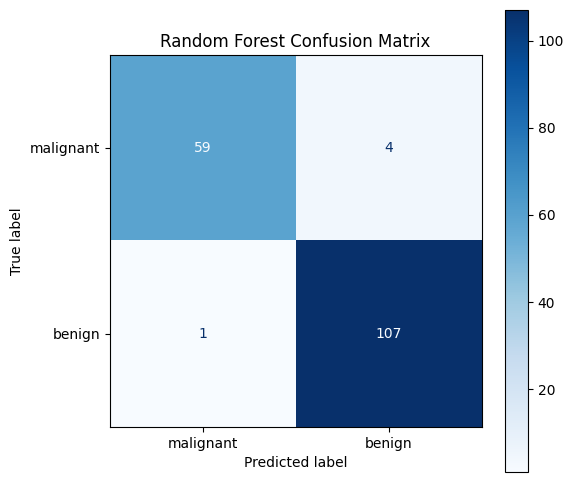

In [16]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

rf_clf_cm = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_cm.fit(X_cls_train, y_cls_train)
y_pred_cm = rf_clf_cm.predict(X_cls_test)

cm = confusion_matrix(y_cls_test, y_pred_cm)

print("Confusion Matrix:")
# Print the raw matrix
print(cm)

# Plotting the matrix (requires a plot window)
try:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_cls.target_names)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.title("Random Forest Confusion Matrix")
    # plt.show() # Uncomment to display the plot
    print("Confusion Matrix plot generated (requires plt.show() to display in a non-interactive environment).")
except Exception as e:
    print(f"Could not display plot due to environment issue (e.g., missing GUI): {e}")

In [17]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
# Base estimators need the scaled data for SVM and LR, but the StackingClassifier handles the fit transformation internally if needed.
# We will use the already scaled data for fairness.
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(solver='liblinear', random_state=42))
]

# The final estimator (meta-model)
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),
    cv=3,
    n_jobs=-1
)

stack_clf.fit(X_cls_train_scaled, y_cls_train)
y_pred_stack = stack_clf.predict(X_cls_test_scaled)
accuracy_stack = accuracy_score(y_cls_test, y_pred_stack)

# Compare with the Bagging DT accuracy from Q21
print(f"Stacking Classifier Accuracy: {accuracy_stack:.4f}")
print(f"Bagging Classifier (DT) Accuracy: {accuracy_bag_dt:.4f}")
print(f"Stacking is {'better' if accuracy_stack > accuracy_bag_dt else 'worse'} in this comparison.")

Stacking Classifier Accuracy: 0.9825
Bagging Classifier (DT) Accuracy: 0.9591
Stacking is better in this comparison.


In [18]:
# 37. Train a Random Forest Classifier and print the top 5 most important features
# Use the feature importances calculated in Q23
top_5_features = feature_importances.head(5)
print("Top 5 Most Important Features in Random Forest:")
print(top_5_features)

Top 5 Most Important Features in Random Forest:
mean concave points     0.141934
worst concave points    0.127136
worst area              0.118217
mean concavity          0.080557
worst radius            0.077975
dtype: float64


In [19]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
# Use the trained Bagging Classifier and predictions from Q21
y_pred_bag_dt = bag_clf_dt.predict(X_cls_test)
precision = precision_score(y_cls_test, y_pred_bag_dt)
recall = recall_score(y_cls_test, y_pred_bag_dt)
f1 = f1_score(y_cls_test, y_pred_bag_dt)

print(f"Bagging Classifier (DT) Metrics:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")

Bagging Classifier (DT) Metrics:
  Precision: 0.9633
  Recall:    0.9722
  F1-Score:  0.9677


In [20]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
max_depth_list = [5, 10, 20, None] # None means no limit (full depth)
depth_results = {}

print("Random Forest Accuracy Comparison by Max Depth:")
for depth in max_depth_list:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, n_jobs=-1)
    rf_clf.fit(X_cls_train, y_cls_train)
    y_pred = rf_clf.predict(X_cls_test)
    accuracy = accuracy_score(y_cls_test, y_pred)
    depth_label = 'None (Full)' if depth is None else str(depth)
    depth_results[depth_label] = accuracy
    print(f"Max_Depth={depth_label:<10}: Accuracy={accuracy:.4f}")

Random Forest Accuracy Comparison by Max Depth:
Max_Depth=5         : Accuracy=0.9649
Max_Depth=10        : Accuracy=0.9708
Max_Depth=20        : Accuracy=0.9708
Max_Depth=None (Full): Accuracy=0.9708


In [21]:
# 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

# 1. Decision Tree Base Estimator (already calculated in Q22)
mse_dt_base = mse_bag_reg

# 2. KNeighbors Regressor Base Estimator
knn_base = KNeighborsRegressor(n_neighbors=5)
bag_reg_knn = BaggingRegressor(
    estimator=knn_base,
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)
bag_reg_knn.fit(X_reg_train, y_reg_train)
y_pred_bag_knn = bag_reg_knn.predict(X_reg_test)
mse_knn_base = mean_squared_error(y_reg_test, y_pred_bag_knn)

print(f"Bagging Regressor (DT Base) MSE:   {mse_dt_base:.4f}")
print(f"Bagging Regressor (KNN Base) MSE: {mse_knn_base:.4f}")
print(f"The {'DT Base' if mse_dt_base < mse_knn_base else 'KNN Base'} base estimator performed better (lower MSE is better).")

Bagging Regressor (DT Base) MSE:   722.3321
Bagging Regressor (KNN Base) MSE: 1153.6753
The DT Base base estimator performed better (lower MSE is better).


In [22]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
rf_clf_auc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_auc.fit(X_cls_train, y_cls_train)

# Get probability scores for the positive class (class 1)
y_proba_rf = rf_clf_auc.predict_proba(X_cls_test)[:, 1]
auc_rf = roc_auc_score(y_cls_test, y_proba_rf)

print(f"Random Forest Classifier ROC-AUC Score: {auc_rf:.4f}")

Random Forest Classifier ROC-AUC Score: 0.9968


In [23]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation.
bag_clf_cv = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    n_jobs=-1,
    random_state=42
)
# Perform 5-fold cross-validation on the entire dataset
cv_scores = cross_val_score(bag_clf_cv, X_cls, y_cls, cv=5, scoring='accuracy', n_jobs=-1)

print(f"Bagging Classifier Cross-Validation Accuracy Scores (5-fold): {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev of CV Accuracy: {cv_scores.std():.4f}")

Bagging Classifier Cross-Validation Accuracy Scores (5-fold): [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean CV Accuracy: 0.9544
Std Dev of CV Accuracy: 0.0339


Precision-Recall AUC: 0.9982
Precision-Recall curve plot generated (requires plt.show() to display).


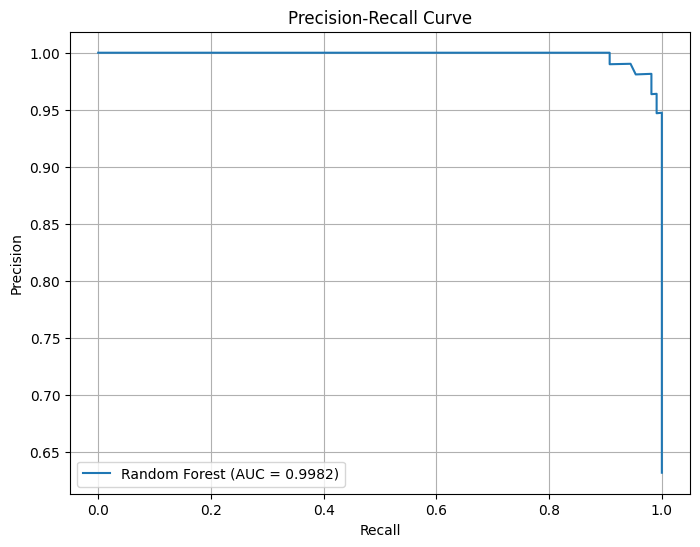

In [24]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve
rf_clf_prc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_prc.fit(X_cls_train, y_cls_train)

# Get probability scores for the positive class
y_proba_prc = rf_clf_prc.predict_proba(X_cls_test)[:, 1]

# Calculate Precision and Recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_cls_test, y_proba_prc)
pr_auc = auc(recall, precision)

# Plotting the curve
try:
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Random Forest (AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.grid(True)
    # plt.show() # Uncomment to display the plot
    print(f"Precision-Recall AUC: {pr_auc:.4f}")
    print("Precision-Recall curve plot generated (requires plt.show() to display).")
except Exception as e:
    print(f"Precision-Recall AUC: {pr_auc:.4f}")
    print(f"Could not display plot due to environment issue (e.g., missing GUI): {e}")

In [25]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
# Use scaled data for Logistic Regression
estimators_rf_lr = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)),
    ('lr', LogisticRegression(solver='liblinear', random_state=42))
]

# The final estimator (meta-model)
stack_clf_rf_lr = StackingClassifier(
    estimators=estimators_rf_lr,
    final_estimator=LogisticRegression(random_state=42),
    cv=3,
    n_jobs=-1
)

# Fit using scaled data as one base estimator is LR
stack_clf_rf_lr.fit(X_cls_train_scaled, y_cls_train)
y_pred_stack_rf_lr = stack_clf_rf_lr.predict(X_cls_test_scaled)
accuracy_stack_rf_lr = accuracy_score(y_cls_test, y_pred_stack_rf_lr)

# Compare with the Bagging DT accuracy from Q21
print(f"Stacking Classifier (RF+LR) Accuracy: {accuracy_stack_rf_lr:.4f}")
print(f"Bagging Classifier (DT) Accuracy:     {accuracy_bag_dt:.4f}")

Stacking Classifier (RF+LR) Accuracy: 0.9766
Bagging Classifier (DT) Accuracy:     0.9591


In [26]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
max_samples_list = [0.5, 0.75, 1.0]
samples_results = {}
base_reg = DecisionTreeRegressor(random_state=42)

print("Bagging Regressor MSE Comparison by Max Samples (Bootstrap Size):")
for ms in max_samples_list:
    bag_reg_ms = BaggingRegressor(
        estimator=base_reg,
        n_estimators=100,
        max_samples=ms,
        n_jobs=-1,
        random_state=42
    )
    bag_reg_ms.fit(X_reg_train, y_reg_train)
    y_pred = bag_reg_ms.predict(X_reg_test)
    mse = mean_squared_error(y_reg_test, y_pred)
    samples_results[ms] = mse
    print(f"Max_Samples={ms:.2f}: MSE={mse:.4f}")

Bagging Regressor MSE Comparison by Max Samples (Bootstrap Size):
Max_Samples=0.50: MSE=735.2602
Max_Samples=0.75: MSE=743.0196
Max_Samples=1.00: MSE=722.3321
